# 01 : Data Loading and Preprocessing

In [238]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [239]:
# 1. Load the Dataset

df = pd.read_csv('/content/Netflix_Userbase.csv')
df.sample(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
749,750,Basic,13,09-07-22,29-06-23,Germany,47,Male,Smart TV,1 Month
1543,1544,Standard,14,25-10-22,05-07-23,Australia,47,Male,Tablet,1 Month
755,756,Premium,14,23-08-22,29-06-23,Spain,44,Female,Smartphone,1 Month
2101,2102,Premium,14,27-10-22,09-07-23,Brazil,48,Female,Smartphone,1 Month
140,141,Premium,12,11-05-22,27-06-23,United States,42,Male,Smartphone,1 Month


In [240]:
# 2. Handling Missing Values
# Check if there are any missing values in the DataFrame
if df.isna().sum().sum() > 0:
    # If there are missing values, drop rows with missing values
    df.dropna(inplace=True)
else:
    # If there are no missing values, print a message
    print('No Missing Values')


No Missing Values


In [241]:
# 3. Encode Categorical Variables
# Make a copy of the DataFrame to avoid modifying the original DataFrame
sub_df = df.copy()

# Identify categorical columns
categorical_cols = sub_df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for col in categorical_cols:
    sub_df[col] = label_encoder.fit_transform(sub_df[col])

# Define features (X) and target variable (y)
X = sub_df.drop(columns=['Monthly Revenue'])
y = sub_df['Monthly Revenue']


In [242]:
# 4. Feature Selection
# Define the number of features to select
k = 9

# Initialize SelectKBest with chi2 scoring function and k features
selector = SelectKBest(score_func=chi2, k=k)

# Transform the features to select the k best features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Filter the DataFrame to keep only the selected features
sub_df = sub_df[selected_features]

# Print the selected features
print("Selected features:", selected_features)


Selected features: Index(['User ID', 'Subscription Type', 'Join Date', 'Last Payment Date',
       'Country', 'Age', 'Gender', 'Device', 'Plan Duration'],
      dtype='object')


# 02 : Exploratory Data Analysis

In [243]:
# 1. Descriptive Analysis

sub_df.describe()

,User ID,Subscription Type,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0
mean,1250.50000,0.907600,148.159600,11.542000,5.116400,38.795600,0.497200,1.500400,0.0
std,721.83216,0.835788,88.190591,8.517256,2.972942,7.171778,0.500092,1.125036,0.0
min,1.00000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.0
25%,625.75000,0.000000,69.000000,4.000000,2.000000,32.000000,0.000000,0.000000,0.0
50%,1250.50000,1.000000,149.000000,10.000000,6.000000,39.000000,0.000000,2.000000,0.0
75%,1875.25000,2.000000,224.000000,21.000000,8.000000,45.000000,1.000000,3.000000,0.0
max,2500.00000,2.000000,299.000000,25.000000,9.000000,51.000000,1.000000,3.000000,0.0


<ipython-input-244-590fa34370fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Monthly Revenue', data=revenue_by_country, palette='viridis')


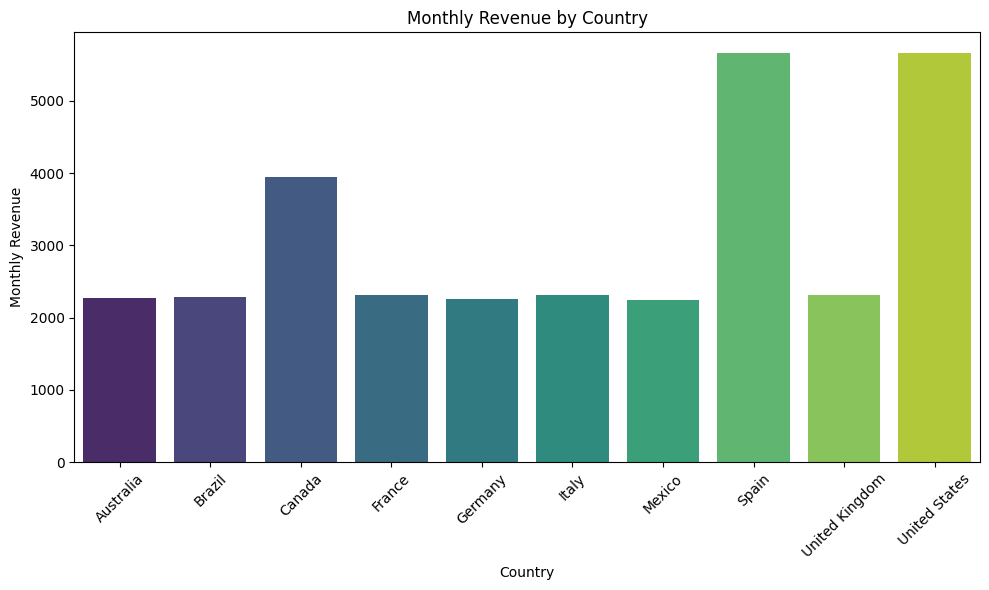

In [244]:
# Visualization: Distribution of Monthly Revenue
# Group the DataFrame by 'Country' and calculate the total Monthly Revenue for each country
revenue_by_country = df.groupby('Country')['Monthly Revenue'].sum().reset_index()

# Create a bar plot to visualize Monthly Revenue by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Monthly Revenue', data=revenue_by_country, palette='viridis')
plt.title('Monthly Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Monthly Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plot
plt.show()


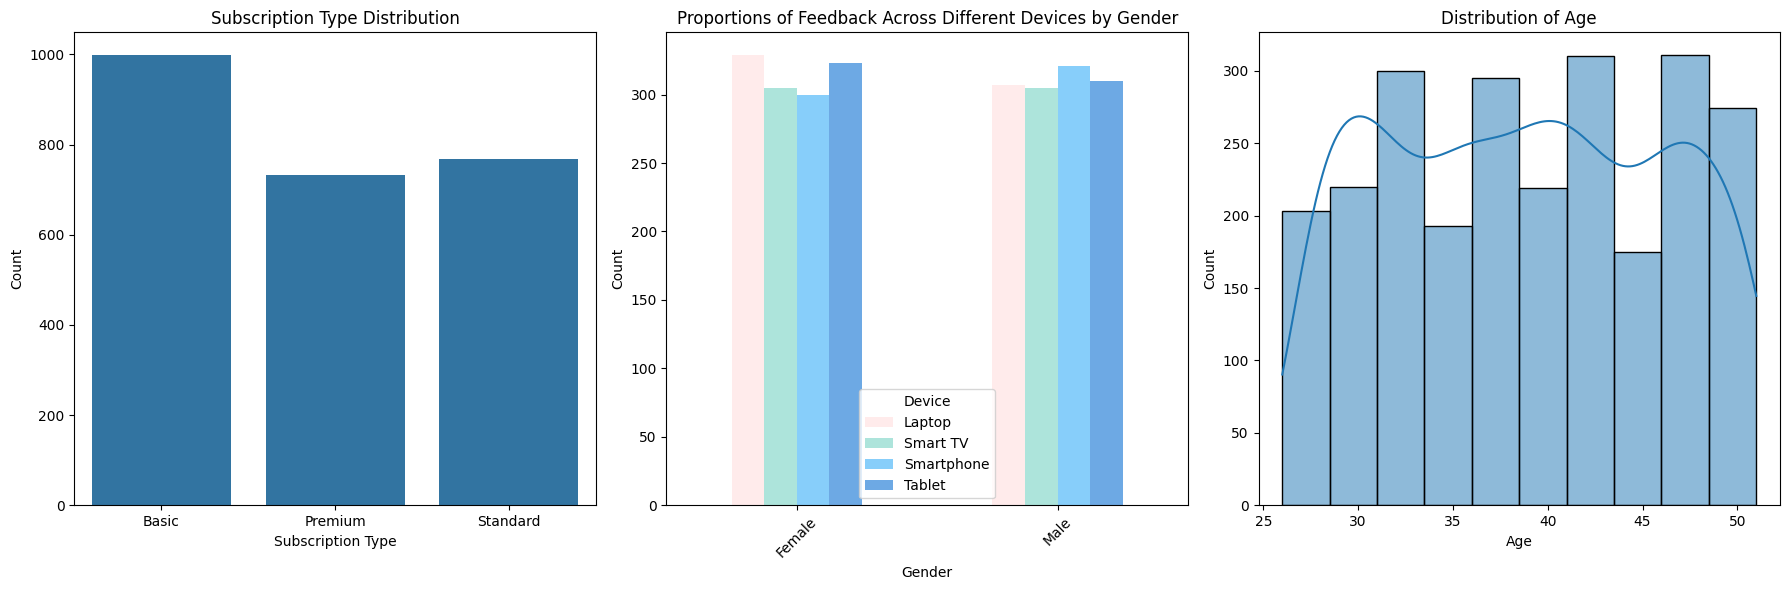

In [245]:
# Visualization: User Demographic
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Subscription Type distribution
sns.countplot(data=df, x='Subscription Type', ax=axs[0])
axs[0].set_title('Subscription Type Distribution')
axs[0].set_xlabel('Subscription Type')
axs[0].set_ylabel('Count')

# Plot proportions of Feedback across different Devices by Gender
grouped = df.groupby('Gender')['Device'].value_counts().unstack().fillna(0)
grouped.plot(kind='bar', ax=axs[1], color=['#FFEBEB', '#ADE4DB', '#87CEFA', '#6DA9E4'])
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')
axs[1].set_title('Proportions of Feedback Across Different Devices by Gender')
axs[1].legend(title='Device')
axs[1].tick_params(axis='x', rotation=45)

# Plot Age distribution
sns.histplot(data=df, x='Age', bins=10, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Age')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Count')

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plot
plt.show()


# 03 : Linear Regression Model (predicting monthly revenue)


In [246]:
# 1. Build the Model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the features for the intercept in the model
X_train = sm.add_constant(X_train)

# Fit the linear regression model using Ordinary Least Squares (OLS)
model_linr = sm.OLS(y_train, X_train).fit()

# Test the Model

# Add a constant term to the test features as well for consistency
X_test = sm.add_constant(X_test)

# Make predictions on the test set
y_pred = model_linr.predict(X_test)


In [247]:
# 2. Model Evaluation

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print("R-squared:", r2)
print("RMSE:", rmse)


R-squared: -0.010067084577740859
RMSE: 1.6703181906657527


# 04 : Logistic Regression Model (predicting customer feedback)


In [248]:
# Model Building

# Convert categorical variables into dummy/indicator variables
df_dummies = pd.get_dummies(df, drop_first=True)

# Create 'Feedback' column based on 'Monthly Revenue'
# If 'Monthly Revenue' is greater than or equal to 12, set 'Feedback' to 'Positive', otherwise 'Negative'
df_dummies['Feedback'] = ['Positive' if x >= 12 else 'Negative' for x in df_dummies['Monthly Revenue']]

# Define features (x) and target (y)
x = df_dummies.drop('Feedback', axis=1)
y = df_dummies['Feedback']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and fit logistic regression model
model_logr = LogisticRegression()
model_logr.fit(x_train_scaled, y_train)


LogisticRegression()

In [251]:
# Evaluation

# Make predictions on the test set
y_pred = model_logr.predict(x_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion matrix:\n{conf_matrix}')


Accuracy: 0.996
Precision: 0.9960481927710844
Recall: 0.996
F1-score: 0.9960061510628675
Confusion matrix:
[[164   0]
 [  2 334]]


# 05 : Comparative Analysis and Visualization

In [250]:
# 1. Feature Importance

# For Linear Regression Model
# Get the coefficients
coefficients_lr = model_linr.params

# Calculate absolute values of coefficients for feature importance
feature_importance_lr = abs(coefficients_lr)

# Sort feature importance in descending order
feature_importance_lr = feature_importance_lr.sort_values(ascending=False)

# Print feature importance for Linear Regression
print("Feature Importance for Linear Regression:")
print(feature_importance_lr)

# For Logistic Regression Model
# Get the coefficients
coefficients_logistic = model_logr.coef_[0]

# Calculate absolute values of coefficients for feature importance
feature_importance_logistic = abs(coefficients_logistic)

# Create a Series with feature importance, indexed by feature names
feature_importance_logistic = pd.Series(feature_importance_logistic, index=x.columns).sort_values(ascending=False)

# Print feature importance for Logistic Regression
print("Feature Importance for Logistic Regression:")
print(feature_importance_logistic)


Feature Importance for Linear Regression:
const                12.887754
Device                0.024977
Subscription Type     0.022692
Country               0.013009
Age                   0.008921
Gender                0.005852
Last Payment Date     0.002509
Join Date             0.000456
User ID               0.000047
Plan Duration         0.000000
dtype: float64
Feature Importance for Logistic Regression:
Monthly Revenue       9.140126
Join Date_03-11-22    0.264396
Join Date_18-08-22    0.209964
Join Date_29-10-22    0.208035
Join Date_22-07-22    0.207738
                        ...   
Join Date_19-03-22    0.000000
Join Date_14-12-22    0.000000
Join Date_11-03-22    0.000000
Join Date_10-12-22    0.000000
Join Date_02-06-23    0.000000
Length: 342, dtype: float64


# Good evening, sir.

I apologize for the delay in submitting Exercise 7. I understand the importance of timely submissions and deeply regret any inconvenience caused.

The reason for my delayed submission is that my grandfather passed away. I have been occupied with assisting my family with the funeral arrangements and other necessary tasks.

Thank you for your understanding during this difficult time.
